In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import itertools

In [2]:
df = pd.read_csv(r'/Users/paramjoga/Downloads/Mall_Customers.csv.xls')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [107]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [108]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Data Preprocessing 

In [109]:
df.rename(columns = {'Genre': 'Gender','Spending Score (1-100)':'Spending_Score','Annual Income (k$)':'Annual_Income'},inplace=True)

In [110]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [111]:
df.isnull().sum()


CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [112]:
df = df.drop("CustomerID",axis=1)

In [113]:
print('There are {} customers.'.format(len(df)))


There are 200 customers.


In [114]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

C:\Users\rohith pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

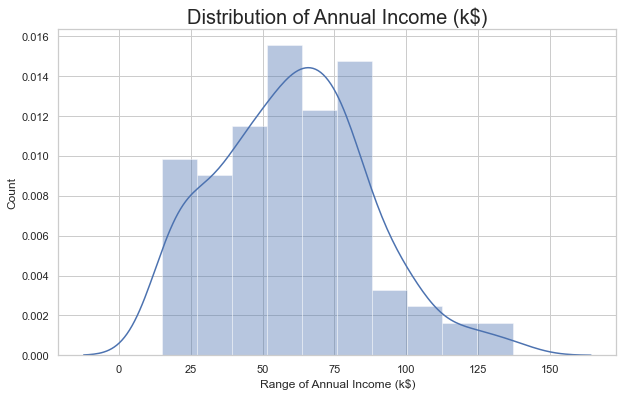

In [115]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual_Income'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

C:\Users\rohith pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

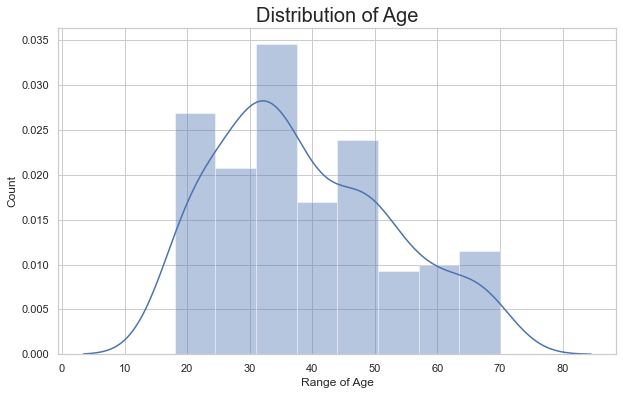

In [116]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

C:\Users\rohith pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

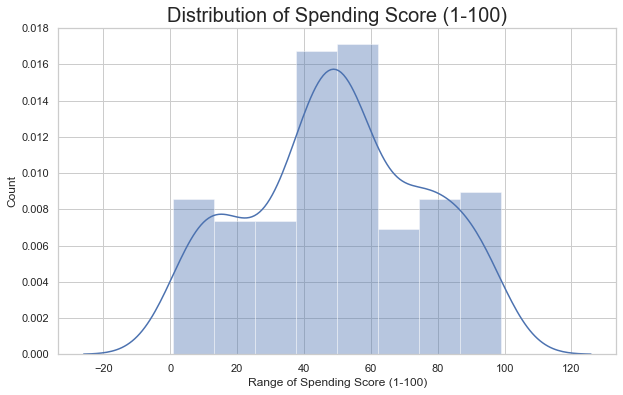

In [117]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Spending_Score'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

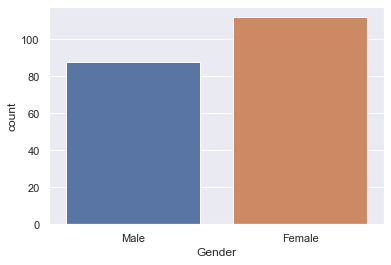

In [118]:
sns.set() 
sns.countplot(x=df.Gender,data=df)
plt.show()

In [15]:
pd.pivot_table(df,index=["Gender"],values=["Spending_Score"])

,Spending_Score
Gender,
Female,51.526786
Male,48.511364


In [16]:
print('mean is {0} and median is {1}'.format(df.Age.mean(),df.Age.median()))

mean is 38.85 and median is 36.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

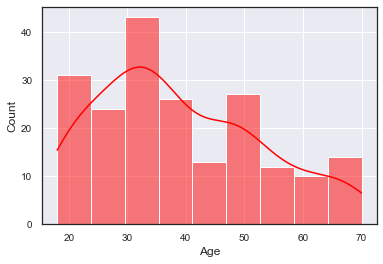

In [103]:
sns.histplot(df.Age,kde=True,color='red')

<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

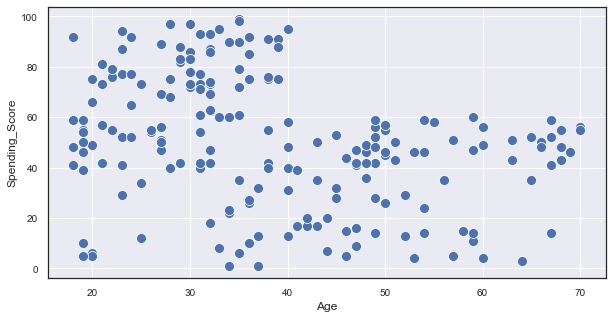

In [102]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.Age,y=df.Spending_Score,s=100)

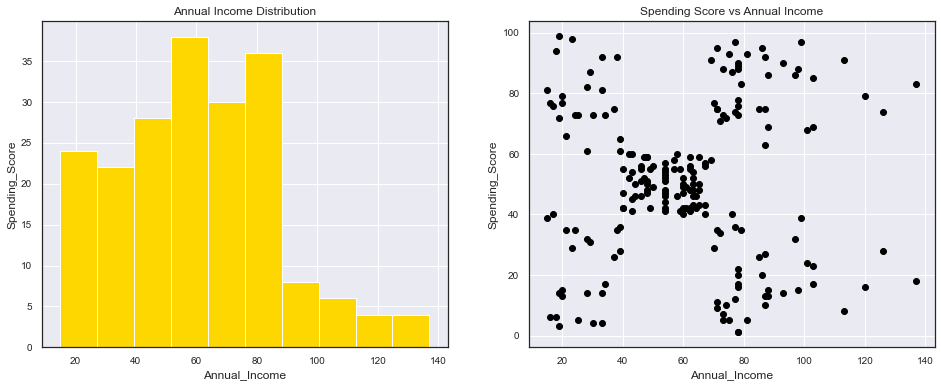

In [101]:
# What is the Distribution Of Anual Income? And How does it relates with Spending Score? 
fig,ax = plt.subplots(1,2,figsize=(16,6))
ax[0].hist(df.Annual_Income,color='gold')
ax[0].set(title='Annual Income Distribution',xlabel='Annual_Income', ylabel='Spending_Score')

ax[1].scatter(df.Annual_Income,df.Spending_Score,color='black')
ax[1].set(xlabel='Annual_Income',ylabel='Spending_Score',title='Spending Score vs Annual Income')
plt.show()

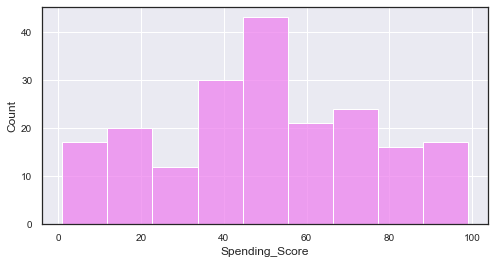

In [100]:
plt.figure(figsize=(8,4))
sns.histplot(df.Spending_Score,color='violet')
plt.show()

In [120]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Age,Annual_Income,Spending_Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


# 1) KMeans Clustering Model

In [134]:
k_cluster = KMeans(n_clusters=5, random_state=0)

C:\Users\rohith pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


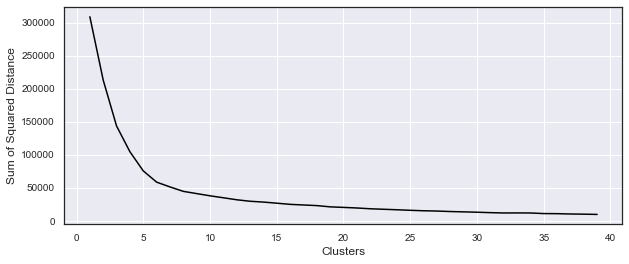

In [135]:
ssq_distance = []
for k in range(1 ,40):
    cluster = KMeans(n_clusters=k, random_state=0)
    cluster.fit(df)
    ssq_distance.append(cluster.inertia_)
    
plt.figure(1 , figsize = (10 ,4))
plt.plot(list(range(1,40)), ssq_distance,color='black')
plt.xlabel('Clusters') , plt.ylabel('Sum of Squared Distance')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=12) 
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25
plt.rcParams["axes.grid"] = True
plt.show()

In [136]:
k_cluster.fit(df)
k_labels = k_cluster.labels_

Text(0.5, 1.0, 'Age Vs Spending Score')

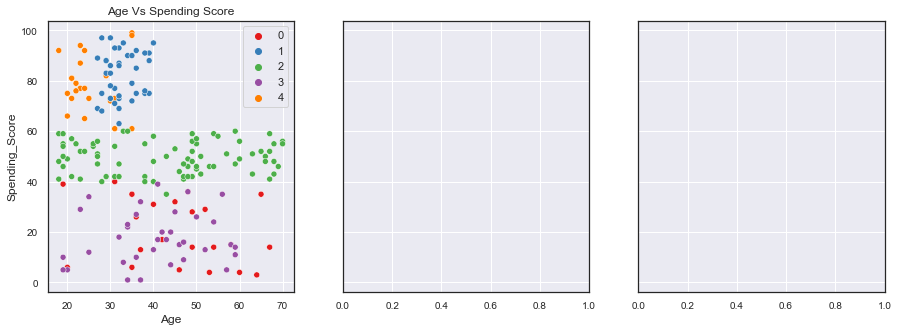

In [165]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0],x=df.Age, y=df.Spending_Score,hue=k_labels,palette='Set1')
axes[0].set_title('Age Vs Spending Score')





Text(0.5, 17.200000000000003, 'Annual Income')

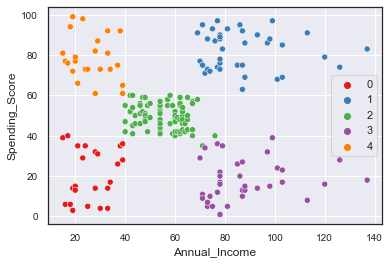

In [164]:
sns.scatterplot( x=df.Annual_Income, y=df.Spending_Score,hue=k_labels,palette='Set1')
axes[1].set_title('Annual Income Vs Spending Score')
axes[1].set_ylabel('Spending Score')
axes[1].set_xlabel('Annual Income')

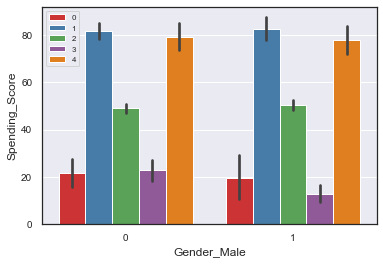

In [161]:
sns.barplot( x=df.Gender_Male, y=df.Spending_Score,hue=k_labels,palette='Set1')
axes[2].set_title('Gender Vs Spending Score')
axes[2].set_xlabel('Gender')
plt.legend( loc='upper left', fontsize=8)
plt.show()

# 2) DBSCAN Clustering Model


In [26]:
dbscan=DBSCAN(eps=12,min_samples=7.5)

cluster=dbscan.fit(df)
db_labels=cluster.labels_

In [27]:
no_clusters=len(set(db_labels))- (1 if -1 in db_labels else 0)
print('there are {} clusters'.format(no_clusters))

there are 4 clusters


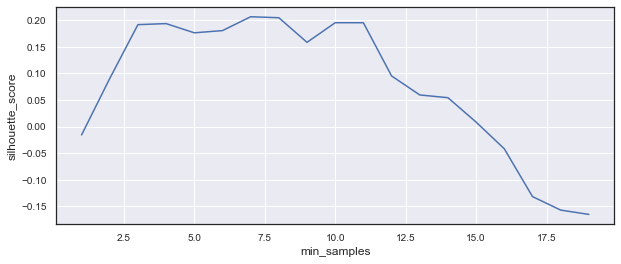

In [80]:
sh_score = []
for num in range(1,20):
  dbscan=DBSCAN(eps=12,min_samples=num)
  model=dbscan.fit(df)
  d_labels=model.labels_
  score = metrics.silhouette_score(df,d_labels)
  sh_score.append(score)
plt.figure(figsize=(10,4))
plt.plot(list(range(1,20)),sh_score)
plt.xlabel('min_samples')
plt.ylabel('silhouette_score')
plt.show()

Text(0.5, 1.0, 'Age Vs Spending Score')

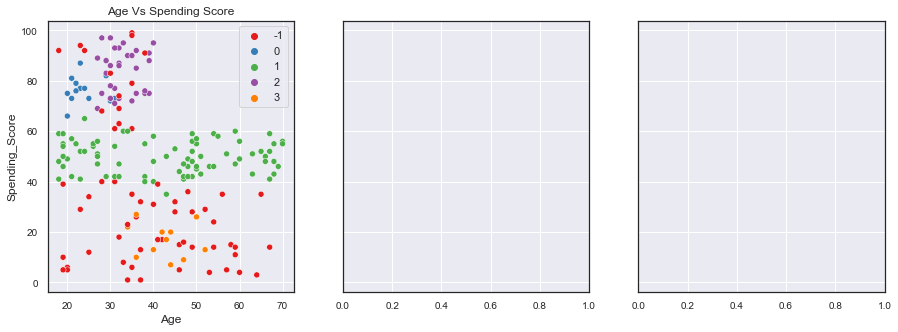

In [167]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0],x=df.Age, y=df.Spending_Score,hue=db_labels,palette='Set1')
axes[0].set_title('Age Vs Spending Score')




Text(338.98676470588236, 0.5, 'Spending Score')

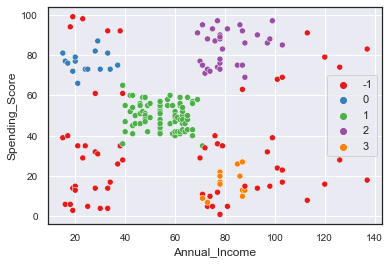

In [169]:
sns.scatterplot( x=df.Annual_Income, y=df.Spending_Score,hue=db_labels,
                palette='Set1')
axes[1].set_title('Annual Income Vs Spending Score')
axes[1].set_ylabel('Spending Score')


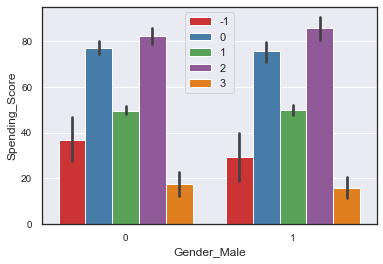

In [171]:
sns.barplot( x=df.Gender_Male, y=df.Spending_Score,hue=db_labels
            ,palette='Set1')
axes[2].set_title('Gender Vs Spending Score')
axes[2].set_xlabel('Gender')
plt.show()

# Models Performance And Evaluation Using Sihoutte Coefficient

### KMeans Model

In [30]:
coef = metrics.silhouette_score(df,k_labels)
print('The sihoutte score is {}'.format(coef))

davies_bouldin = davies_bouldin_score(df,k_labels)
print('Davies Bouldin Score: ', davies_bouldin )

The sihoutte score is 0.4440669204743008
Davies Bouldin Score:  0.8222596417814175


### DBSCAN Model 

In [31]:
coef = metrics.silhouette_score(df,db_labels)
print('The sihoutte score is {}'.format(coef))

davies_bouldin = davies_bouldin_score(df,db_labels)
print('Davies Bouldin Score: ', davies_bouldin )

The sihoutte score is 0.20473300000169162
Davies Bouldin Score:  2.235936061237859


# 3) Agglomerative Clustering (Dendrograms & PCA)

In [32]:
df.head()

,Age,Annual_Income,Spending_Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [33]:
columns_scaler = ['Gender_Male', 'Age', 'Annual_Income', 'Spending_Score']

MinMax= MinMaxScaler()

df_minmax = df.copy()

df_minmax[columns_scaler]=MinMax.fit_transform(df_minmax[columns_scaler])

### Principal Component Analysis (PCA) 

In [34]:
pca = PCA(n_components = 2 )
pca.fit(df_minmax)
df_pca = pca.transform(df_minmax)
df_pca = pd.DataFrame(df_pca, columns = ['P1', 'P2']) 

Text(0, 0.5, 'PCA 2')

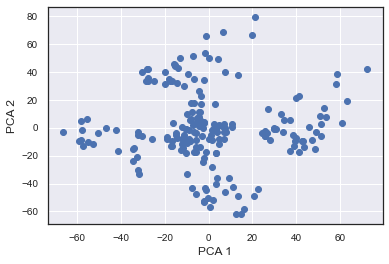

In [82]:
plt.scatter(df_pca.P1, df_pca.P2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

### Dendrograms

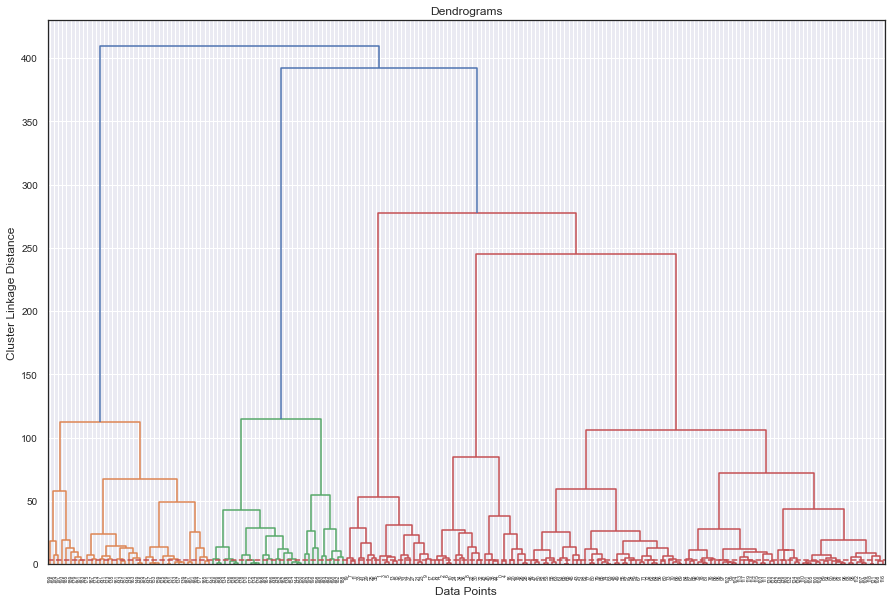

In [128]:
plt.figure(figsize = (15,10))
plt.title('Dendrograms')
plt.ylabel('Cluster Linkage Distance')
plt.xlabel('Data Points')
plt.axhline(y=3, color='r', linestyle='--')
dend = sch.dendrogram(sch.linkage(df_pca, method='ward'))

### Model Creation 

In [37]:
model = AgglomerativeClustering(n_clusters = 4)

y_means = model.fit_predict(df_pca)

In [38]:
silhouette = silhouette_score(df_pca, y_means)
print('Silhouette Score: ', silhouette )

davies_bouldin = davies_bouldin_score(df_pca, y_means)
print('Davies Bouldin Score: ', davies_bouldin )

Silhouette Score:  0.6865138951386944
Davies Bouldin Score:  0.40911039819814327


###  Visualisng of the Result 

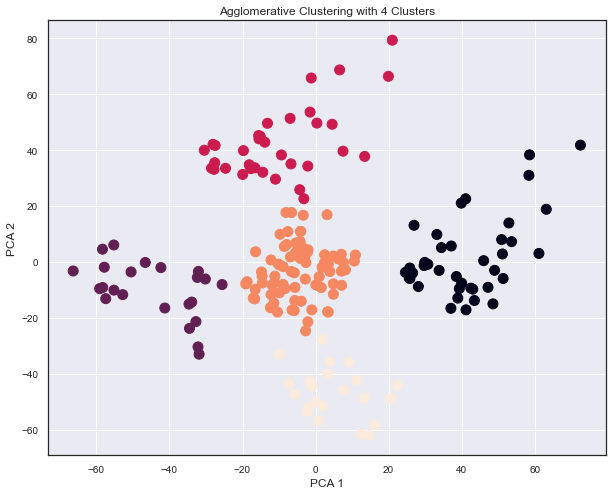

In [129]:
plt.figure(figsize=(10, 8))

plt.title('Agglomerative Clustering with 4 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.scatter(df_pca.P1, df_pca.P2, c=y_means, s=100)

# 4) KMeans with PCA 

In [40]:
def pca(data, n):
    
    if type(n) == int:
        
        pca = PCA(n_components = n )
        pca.fit(data)
        df_pca = pca.transform(data)
        return df_pca
        
    else:
        return data

In [41]:
df_pca = pca(df, 2)
df_pca = pd.DataFrame(df_pca, columns = ['P1','P2'])
df_pca.head()

,P1,P2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412


Text(0, 0.5, 'PCA 2')

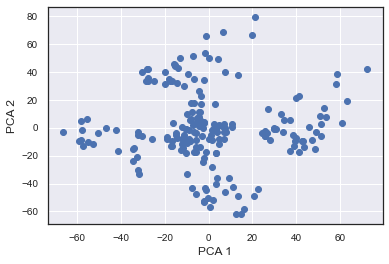

In [85]:
plt.scatter(df_pca.P1, df_pca.P2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [86]:
def cluster_Wcss(data, k ):
       
    wcss = []
    
    for i in range(1, k):
        kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10,5))
    plt.plot(range(1,11), wcss)
    plt.title('The Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()
        

C:\Users\rohith pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


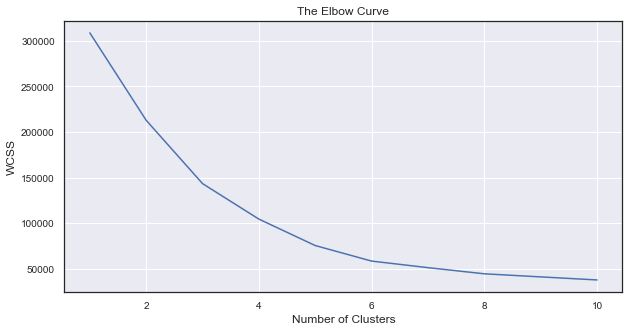

In [87]:
cluster_Wcss(df, 11)

In [90]:
param_data = { 'n' : [2,'False'] }
param_data = [dict(zip(param_data.keys(), v)) for v in itertools.product(*param_data.values())]

param_model = { 
    'n_clusters': [3, 4, 5 , 6],
    'init' : ['k-means++'],
    'random_state' :[16]
}
param_model = [dict(zip(param_model.keys(), v)) for v in itertools.product(*param_model.values())]

In [91]:
def cluster(data, param_data, param_model):

    last =[]
    
    for dp in param_data:

        X = pca(data, dp['n'])
        X = pd.DataFrame(X) 
        for mp in param_model:

            model = KMeans(**mp)

            y_means = model.fit_predict(X)
            centers = model.cluster_centers_
            
            silhouette = silhouette_score(X, y_means)
            davies_bouldin = davies_bouldin_score(X, y_means)
            
            res = {}
            res['Model'] = 'Kmeans'
            res['Random_State'] = mp['random_state']
            
            res['Pca'] = dp['n']
            res['Params'] = mp
            res['Centers'] = centers
            res['Silhouette'] = silhouette
            res['Davies_Bouldin'] = davies_bouldin
               
            last.append(res)
            
    result = pd.DataFrame(last, columns=['Model','Pca','Params', 'Centers', 'Silhouette', 'Davies_Bouldin'])
    
    return result

In [98]:
result =  cluster(df,  param_data, param_model)
result = result.sort_values(by=['Silhouette'], ascending=False)
result.head()

,Model,Pca,Params,Centers,Silhouette,Davies_Bouldin
2,Kmeans,2,"{'n_clusters': 5, 'init': 'k-means++', 'random...","[[41.551038751053355, 1.8708754080538395], [-4...",0.552626,0.584301
3,Kmeans,2,"{'n_clusters': 6, 'init': 'k-means++', 'random...","[[54.806617718361835, 18.992161509065788], [-4...",0.534448,0.663913
1,Kmeans,2,"{'n_clusters': 4, 'init': 'k-means++', 'random...","[[-13.167019014458562, -4.623026887458519], [4...",0.499151,0.671398
7,Kmeans,False,"{'n_clusters': 6, 'init': 'k-means++', 'random...","[[56.155555555555544, 53.37777777777778, 49.08...",0.452055,0.747522
0,Kmeans,2,"{'n_clusters': 3, 'init': 'k-means++', 'random...","[[41.551038751053355, 1.8708754080538395], [-1...",0.451053,0.731013


In [48]:
bp = result.Params[2]
bn = result.Pca[2]
bc = result.Centers[2]

In [49]:
X = pca(df, bn)
X = pd.DataFrame(X, columns = ['P1','P2'])

model = KMeans(**bp) 

y_means = model.fit_predict(X)

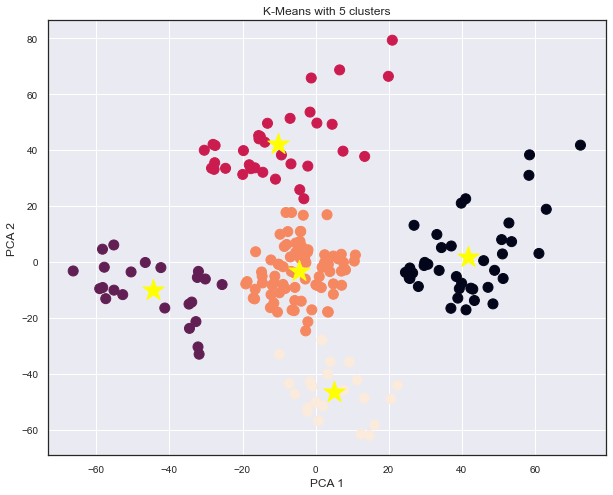

In [130]:
plt.figure(figsize=(10, 8))

plt.title('K-Means with 5 clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.scatter(X.P1, X.P2, c=y_means, s=100)

plt.scatter(bc[:,0], bc[:,1], color='yellow', marker='*', s=500) 

In [131]:
import os 
os.getcwd()

'C:\\Users\\rohith pc'